.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy on the training subset: 0.955
Accuracy on the test subset: 0.951
Accuracy on the training subset:0.953
Accuracy on the test subset: 0.965
Accuracy on the training subset:0.934
Accuracy on the test subset: 0.930
     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=7b9d64fd8a34318871aeb1b3888ca5b67dfe36c367767bf8ef338c83af216e28
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn
Feature importances: [0. 1.]
Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.937
Feature importances: [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.

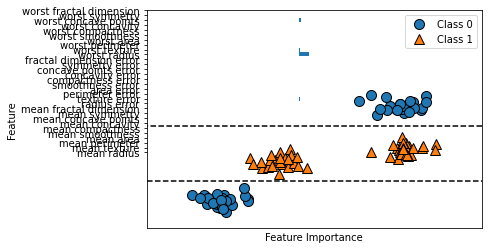

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.972


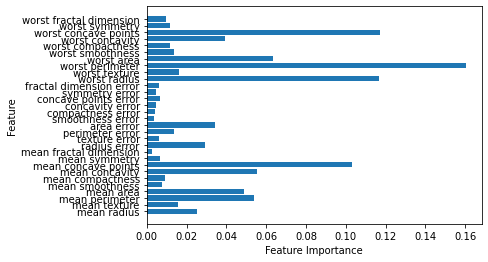

In [1]:
from sklearn.datasets import load_breast_cancer 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
%matplotlib inline
cancer = load_breast_cancer()
print(cancer.DESCR)
print(cancer.feature_names)
print(cancer.target_names)
cancer.data
cancer.data.shape
"""
import pandas as pd 
raw_data=pd.read_csv('breast-cancer-wisconsin-data.csv', delimiter=',') 
raw_data.tail(10)
!pip install mglearn
import mglearn
# mglearn: a library of utility functions the book "Introduction to Machine 
Learning with Python" including scikit-learn functions
mglearn.plots.plot_knn_classification(n_neighbors=3)
"""
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
stratify=cancer.target, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of KNN n-5, on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN n-5, on the test set: {:.3f}'.format(knn.score(X_test, y_test)))
# Resplit the data, with a different randomization (inspired by Muller & Guido ML book - https://www.amazon.com/dp/1449369413/)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
stratify=cancer.target, random_state=66)
# Create two lists for training and test accuracies
training_accuracy = []
test_accuracy = []
# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,11)
# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 training_accuracy.append(clf.score(X_train, y_train))
 test_accuracy.append(clf.score(X_test, y_test))
# Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=6, in this case)
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

#---------------Logistic Regression---------------------
# Using LogisticRegression on the cancer dataset. Inspired by Muller and Gu ido ML book: (https://www.amazon.com/dp/1449369413/)

from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg.score(X_test, y_test)))
"""
'C':
parameter to control the strength of regularization
lower C => log_reg adjusts to the majority of data points. higher C => correct classification of each data point.
"""

log_reg100 = LogisticRegression(C=100) 
log_reg100.fit(X_train, y_train) 
print('Accuracy on the training subset:{:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg100.score(X_test, y_test)))

log_reg001 = LogisticRegression(C=0.01) 
log_reg001.fit(X_train, y_train) 
print('Accuracy on the training subset:{:.3f}'.format(log_reg001.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg001.score(X_test, y_test)))



plt.plot(log_reg.coef_.T, 'o', label='C=1') 
plt.plot(log_reg100.coef_.T, '^', label='C=100') 
plt.plot(log_reg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
plt.hlines(0,0, cancer.data.shape[1])	# hlines: horizontal line
plt.ylim(-5,5)	# ylim: y limit value 
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude') 
plt.legend()

#--------------Decision Trees---------------
!pip install mglearn
import mglearn
import numpy as np
# credits to Muller and Guido (https://www.amazon.com/dp/1449369413/) 
import matplotlib.pyplot as plt
%matplotlib inline

mglearn.plots.plot_tree_not_monotone()
from sklearn.datasets import load_breast_cancer 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))



import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='cancertree.dot', class_names=['malignant', 'b enign'], feature_names=cancer.feature_names,impurity=False, filled=True)

print('Feature importances: {}'.format(tree.feature_importances_)) 
type(tree.feature_importances_)
print(cancer.feature_names) 
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), cancer.feature_names) 
plt.xlabel('Feature Importance')
plt.ylabel('Feature') 
plt.show()

#---------------Random Forests-------
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_breast_cancer 
import matplotlib.pyplot as plt


cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)
# n_estimators：the number of trees

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))

n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), cancer.feature_names) 
plt.xlabel('Feature Importance')
plt.ylabel('Feature') 
plt.show()